<a href="https://colab.research.google.com/github/aamir-ansari-44/Study/blob/main/Adv.%20Supervised%20Learning/lec_kmeans1_sidhu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem statement:

As a data scientist at **Amazon**, you are given a dataset that has details about different customers with features like
- 'ID',
- 'n_clicks',
- 'n_visits', etc,

You are asked to segment these customers so that the **Amazon** can provide relevant and similar items to their customers, which will increase their overall sale.

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-04-01 11:43:26--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 142.251.172.102, 142.251.172.100, 142.251.172.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.172.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-04-01 11:43:26--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.

Let's look at the provided features in our dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


## What is clustering?

- At simple as it can be, clustering is a task of grouping similar objects or data-points.

- **For example**:
  - A professional cricket team can collect information like **runs_per_game**, **wickets_per_game**, **catches_per_game**, etc and then use these features to cluster similar players.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/010/002/original/Screenshot_2022-09-08_at_10.49.09_AM.png?1662613855' height = '500' width = '800'>

In the plot you can observe that we have groups or clusters of similar kind of players like batsman, bowlers, allrounders, etc.

###Intra-cluster and Inter-cluster Distance



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/010/017/original/Screenshot_2022-09-08_at_10.03.24_PM.png?1662654263' width="500">


**Q. What should be the ideal values of inter and intra cluster distances of a clustering?**

- Ideally, **intra-cluster** distance should be **low**
- If the intra cluster distance will be low, the points in the same clusters will be more similar

- And, **inter-cluster** distance should be **high**.
- Incase of higher inter cluster distances, the points in different clusters will be less similar.

### **Dunn Index**

- It is a metric for evaluating clustering algorithms
- The objective of Dunn index is to identify clusters that are:
 - compact with a small variance between members of the cluster
 - and well separated.

**Q. How can we calculate Dunn Index?**
- It is denoted by **‘D’** and is given as:

$D = \frac{min_{i,j} distance(i,j)}{max_k distance^{'}(k)}$

where;
- $distance(i,j)$ → distance between the farthest points of the clusters $C_i$ and $C_j$ → **Inter-Cluster distance**

- ${distance^{'}(k)}$ → distance between the farthest points within the $k^{th}$ clusters **Intra-Cluster distance**

<!-- <img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/125/original/Screenshot_2022-07-29_at_3.53.47_PM.png?1659089763' height = '500' width = '800'>


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/126/original/Screenshot_2022-07-29_at_3.56.07_PM.png?1659089899' height = '500' width = '800'> -->



> **Q. How can we interpret the values of Dunn index?**

- If $Dunn-index$ is high, it implies that clusters are well separated and the points in the same cluster are intact.
- For every pair of points from $C_i$ and $C_j$, we have to compute **$distance(i,j)$** for getting the inter cluster distance.
- Similarly for calculating the **$distance'(k)$** we will have to iterate through each pair of points within $k^{th}$ cluster

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/127/original/Screenshot_2022-07-29_at_3.57.44_PM.png?1659089997' height = '500' width = '800'>


## K-Means Algorithm (Lloyd’s Algorithm)

Lloyd' algorithm is an approximation method we use for k-means clustering, which involve 4 major steps:

> **DEMO:**
Use this animation for better understanding of Llyods algorithm: http://tech.nitoyon.com/en/blog/2013/11/07/k-means/


**1. Initialization**

From the given dataset '**D**', we pick '**K**' points randomly, and assume them to be the initial centroids. Let us denote them as $C_1, C_2, C_3, …, C_k$.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/141/original/Screenshot_2022-07-29_at_4.18.21_PM.png?1659091230' height = '500' width = '800'>


**2. Assignment**

For each point '$x_i$' in the dataset '**D**', we have to compute the distance of each of the above 'K' centroids, and pick the nearest centroid. Let us denote this nearest centroid as '$C_j$'.

Add the point '$x_i$' to the set '$S_j$'(which is associated with the centroid '$C_j$').

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/142/original/Screenshot_2022-07-29_at_4.19.16_PM.png?1659091285' height = '500' width = '800'>


**3. Recompute Centroid (Update Stage)**

- Now  that we've grouped all the datapoints to each clusters, we update the centroid for each and every clusters.


- We recompute/update '$C_j$' as follows:

    - $C_j = (1/|S_j|) * Σ_{x_i∈S_j} x_i$

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/143/original/Screenshot_2022-07-29_at_4.20.53_PM.png?1659091397' height = '500' width = '800'>


**4. Repeat the assignment and update steps until convergence**.

**Q. How do we know if algorithm has converged?**

- Here convergence is the stage where the centroids do not change much.

- For example, after second iteration, if the centroids are $\{C_1, C_2, C_3, …., C_k\}$ and 3rd iteration, if the updated centroids are $C_1$', $C_2$', $C_3$', ….., $C_k$', we say the algorithm has converged if the distance between old centroids and updated centroids is very low.


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/144/original/Screenshot_2022-07-29_at_4.22.29_PM.png?1659091481' height = '500' width = '800'>


- After convergence, we get centroids as $C_1, C_2, C_3, …., C_k$ and the final sets/clusters as $S_1, S_2, S_3, …., S_k$.


####Scratch Code implementation of K-means on a toydataset.

**Initializing all the variables and data**

In [ ]:
data_size = 1000
num_iters = 5
num_clusters = 4

from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0)

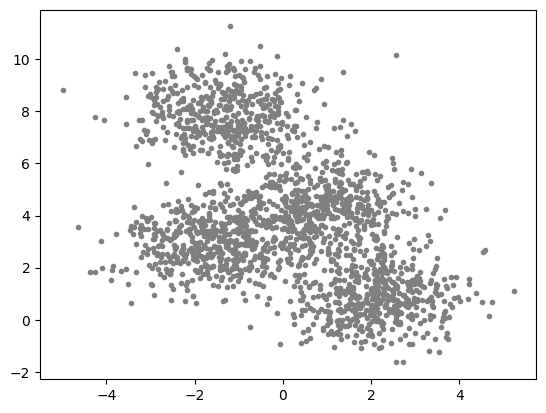

In [ ]:
plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')

**Function to plot the clusters**

In [ ]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

**Implementing K-means**

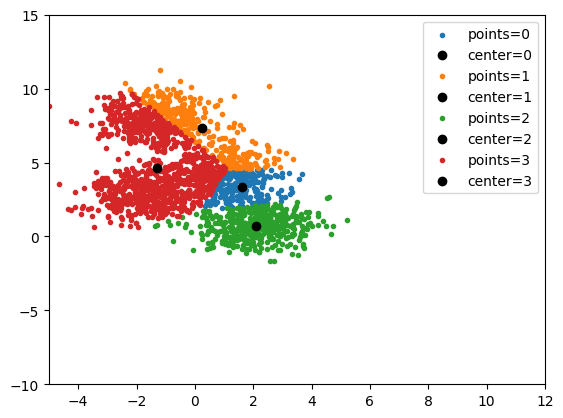

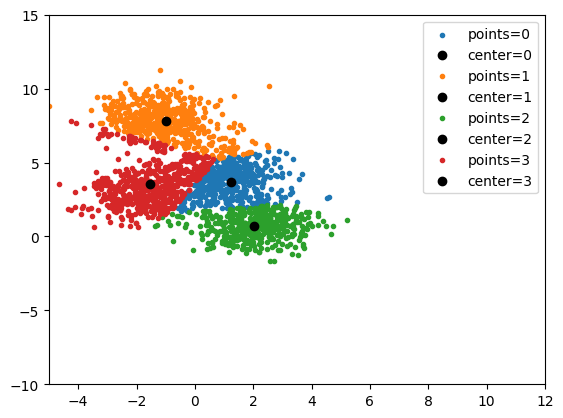

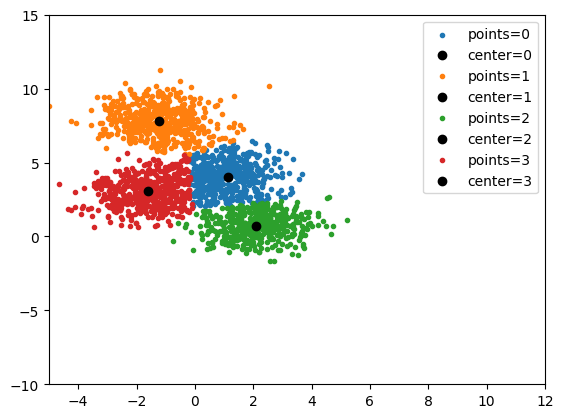

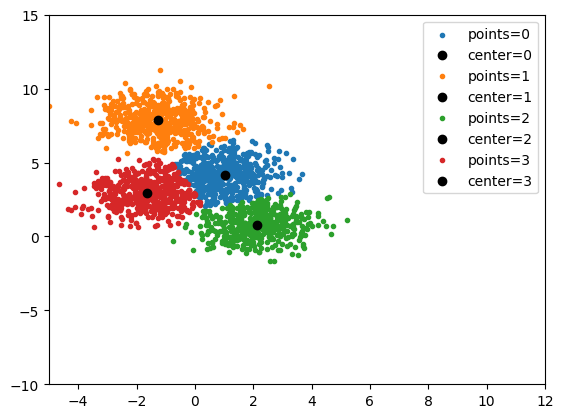

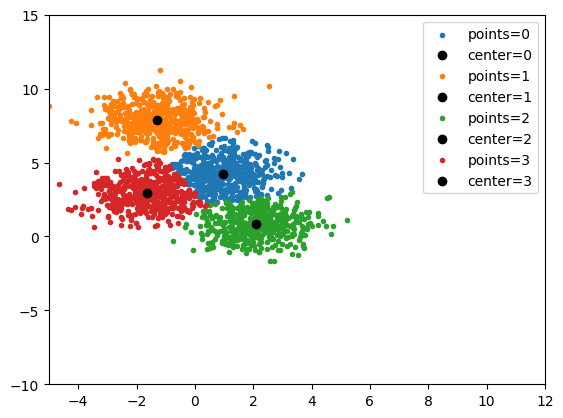

In [ ]:
import numpy as np
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

def compute_l2_distance(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in (centroids):
      # Compute the difference, following by raising to power 2 and summing
      new_dist = np.sqrt(((x - centroid) ** 2).sum(axis = 1)).reshape(-1,1)
      dist = np.hstack([dist,new_dist])
    return dist

def get_closest_centroid(x, centroids):

    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)

    return closest_centroid_index


# Loop over iterations
for n in range(num_iters):

    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)

    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid

    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]

        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)

        # assign the new centroid
        centroids[c] = new_centroid

        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
    # plot(data, centroids)

**Q. How to determine the right value of K? It is 3? It is 10, or 100, or N?**

## Determining the right ‘K’
**How do we determine the right k?**
- In K-Means, **$K$** is a hyperparameter and it can be determined through:

1. **Domain Knowledge**

  - If our problem contains a fixed number of clusters/groups all the time, then ‘**K**’ will be determined using the domain knowledge.

2. **Elbow Method or Knee Method**

 - In this method, we calculate something known as **Within-Cluster Sum of Square (WCSS)**

- WCSS is the sum of squares of the distance of each datapoints present in dataset, to their assigned cluster centroids.

- Suppose there are three centroids $C_1$, $C_2$, and $C_3$. The WCSS will be calculated as follows:

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/067/original/IMG_0013.PNG?1663775769" height = '500' width = '800'>


**Q. How to determine the right $K$ from some distance?**

- To answer this, consider if there were only one cluster. In that case WCSS would be very high, because the distance of all the points with only one centroid would be considered.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/069/original/1_0naSz4RFw_m5VqiRXo2SRw.png?1663776597" height = '500' width = '800'>


- What we do is, we calculate WCSS for different values of K, and plot the
WCSS with the values of K.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/071/original/1_vLTnh9xdgHvyC8WDNwcQQw.png?1663776770' height = '500' width = '800'>

- We pick the value of K after which the WCSS stabilizes and does not significantly decrease as we increase the value of K.

<img src = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/072/original/IMG_0014.jpg?1663777180" height = '500' width = '800'>

**Q. Why not pick the K with the lowest value of WCSS?**
- The value of WCSS would be the lowest (equals to $0$) when each and every point in the dataset is a cluster itself.

- This is not what we would want as a result of clustering, is it?

##K-means implementation


Now that we've understood how K-Means work. Lets come back to the Amazon customers' segmentation.

### **Cleaning + Preprocessing**

**Some things to note about this data**

- CustomerID is just an identifier of the customer - its not a required parameter.
- No categorical variable, but we would have discarded that as well.
- No missing values.

In [ ]:
X=df.drop("ID",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [ ]:
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


### Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
# np.save('scaled_customer_data', X)

Let's use K-means from scikit learn library.

In [ ]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let's try to see what did the Kmeans predict?
- It predicted the cluster labels for all the points.

In [ ]:
y_pred

array([2, 2, 1, ..., 3, 0, 1], dtype=int32)

We can even retrieve the coordinates of centroids of clusters.

In [ ]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.16763001, 0.23205394, 0.5132428 , 0.03436531, 0.378177  ,
        0.36612938],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573],
       [0.27330589, 0.32493667, 0.11230841, 0.06740043, 0.56620473,
        0.34602498],
       [0.28589783, 0.31533458, 0.10716208, 0.06305475, 0.2394147 ,
        0.33093295]])

### Visualizing clusters

Let's create a dataframe where we will add a new column 'label' which will consist of the cluster labels assigned by k-means, for visualization purpose.

In [ ]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,2
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,2
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1


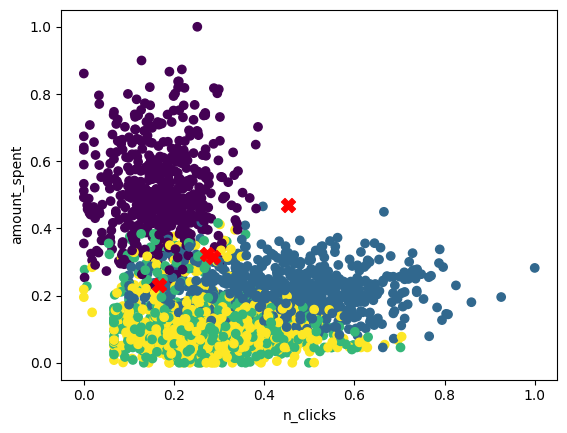

In [ ]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['amount_spent'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('n_clicks')
    plt.ylabel('amount_spent')

viz_clusters(kmeans)

- There is some distinction between clusters, but making sense out of this is a bit hard from this plot.

**A better alternative would be a line polar plot from plotly library - useful for visualizing multi-dimensional data**

- Group the customers by labels and calculate mean for all the features.
- Melt the data to have features on rows along with their corresponding mean values

In [ ]:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar.head(4)

,label,variable,value
0,0,n_clicks,0.167630
1,1,n_clicks,0.453368
2,2,n_clicks,0.273382
3,3,n_clicks,0.285828


In [ ]:
import plotly.express as px

"""
  'polar' : customer dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()


The reason this plot is called polar because all the coordinates are polar coordinates (i.e. circular)

#### **Insights**

- **Polar plot is read and interpreted radially**

  - values increase as we move away from the center, showing the influence of a feature on that label.
  - <font color="green"> green(2) </font> and <font color="purple"> purple(3) </font> overlap on all the features except one.

Looking at this plot, we have different  customer segments:
- **Bargain shoppers**(`label 1`) - people who buy heavily discounted items. **Action:** show them more discounted items. They are also frequent users who have joined the website relatively recent.

- **Inactive old users** (`label 2`) - people who have been a long time user of the app but have not shown much interest now. **Action:** start sending notifications, emails, etc - get them back on the platform.

- **New and inactive users** (`label 3`)- Users who have recently joined but haven't bought much and are not that actively looking for items. Somewhat similar to `label 2`.

- **Premium shopper** (`label 0`) - Affluent customers who don't visit the website very often, not click much but spend a lot of money. **Action:** Show them more quality




**Q. Should we try with a different number of clusters?**

**Q. Does number of clusters affect the performance of the model?**

Lets find out with number of clusters as $3$, $4$, and $5$.



In [ ]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



KMeans(algorithm='full', init='random', n_init=1, random_state=0)

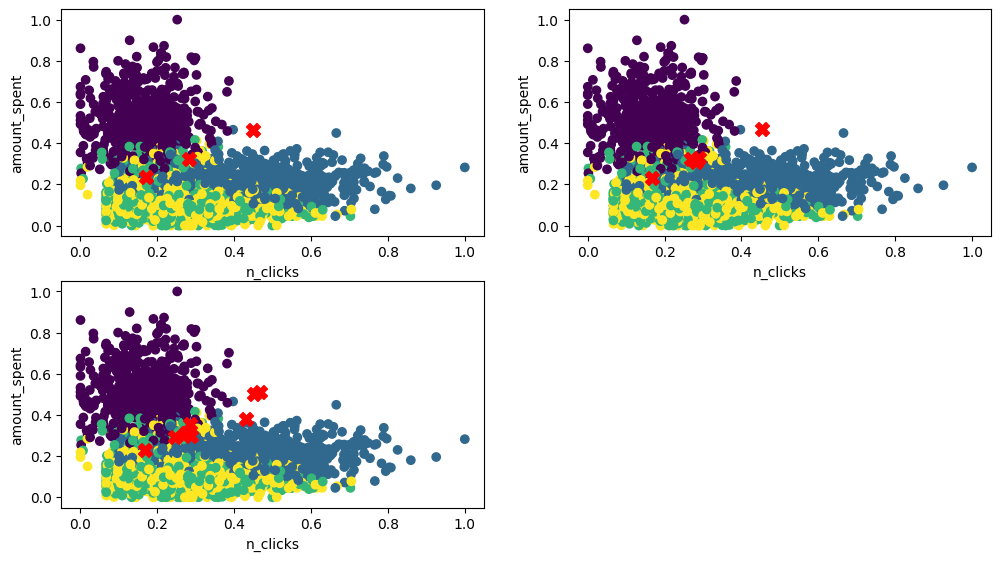

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(kmeans_iter1)

plt.subplot(322)
viz_clusters(kmeans_iter2)

plt.subplot(323)
viz_clusters(kmeans_iter3)

#### **How to select the best model?**

- To select the best model, we need a way to evaluate a K-Means model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets.

- But at least we can measure the distance between each instance and its centroid. This is the idea behind the **inertia metric**. The smaller the inertia value, the more coherent are the different clusters.

- The K-means algorithm aims to choose centroids that minimize the **inertia**, or **within-cluster sum-of-squares** criterion:

  - ${\sum_{i=0}^N min(||x_i - C_j||^2)}$ where;

    - N: No. of samples in dataset <br>
    - $x_i$ : Data Sample i <br>
    - $C_j$ : Centeroid of Cluster j



In [ ]:
kmeans_iter1.inertia_

280.16509626121075

In [ ]:
kmeans_iter3.inertia_

195.24159155451287

### **Let's experiment with different number of clusters and plot their Inertia**

- Calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of K
- Choose the K for which WCSS first starts to diminish.

**The steps can be summarized in the below steps:**
1. Perform K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.
4. The inflectionion point(elbow) in the plot is generally considered to be an indicator of the appropriate number of clusters.


In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

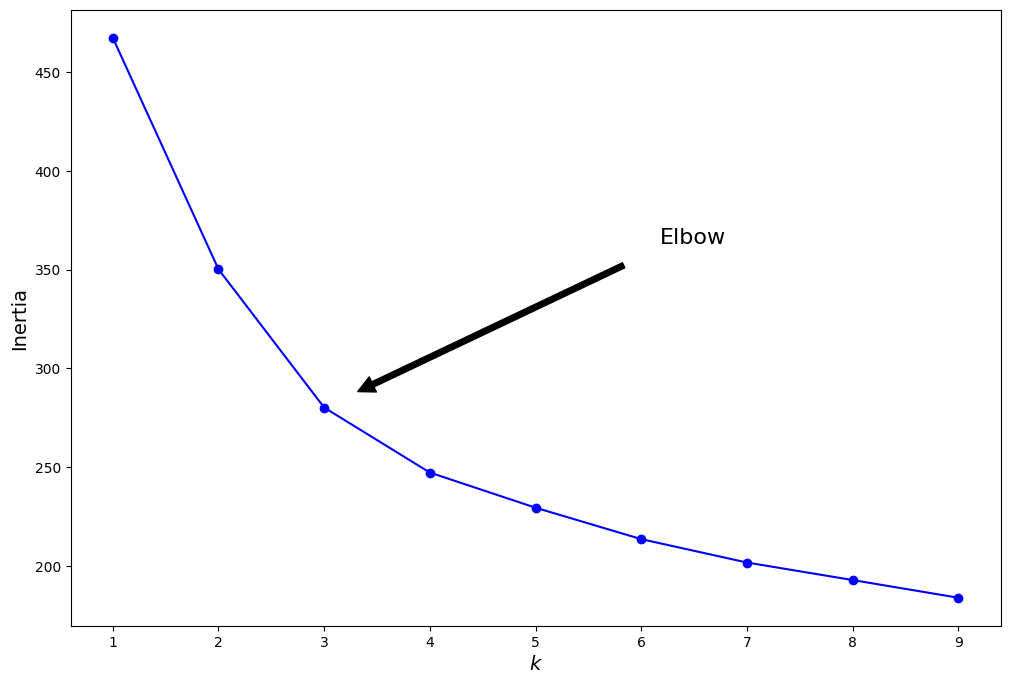

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

- Inflection point is near 3 or 4 where the drops sharply and then slows down
- 3 would be a good choice, any lower value would be dramatic, while any higher value would not help much.

  **The elbow is found when the dataset becomes flat or linear after applying the cluster analysis algorithm.**

But it's not a very precise method

- Elbow curve still relies on human interpretaion of where we see the slope changing.
- It gives a rough estimate only.